<a href="https://colab.research.google.com/github/achalgarg14/session_7/blob/main/Session_7_Assignment_OneCycleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR,OneCycleLR
from tqdm import tqdm
import torch.nn as nn
import numpy as  np

In [2]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 1.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


# Linking with Drive for saving the model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing from Github

In [5]:
!git clone https://github.com/achalgarg14/eva8_main_folder

Cloning into 'eva8_main_folder'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), 10.50 KiB | 2.10 MiB/s, done.


## Importing ResNet18

In [6]:
from eva8_main_folder.models import resnet
from eva8_main_folder.models.resnet import ResNet18

## Importing Main and Utils

In [7]:
from eva8_main_folder import main, utils
from eva8_main_folder.utils import *    
from eva8_main_folder.main import *

# Assigning Device

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [9]:
view_model = ResNet18().to(device)
view_model_summary(view_model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


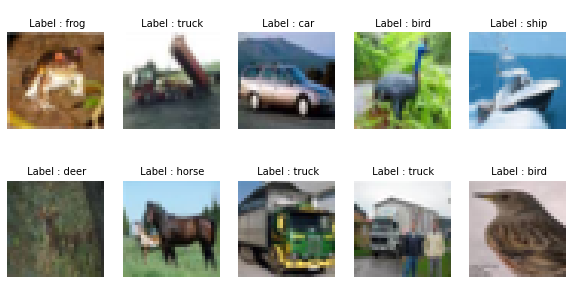

In [10]:
model = ResNet18().to(device)
trainset_mod, trainloader_mod, testset_mod, testloader_mod = process_dataset() 

In [11]:
model_tr, train_loss, test_loss, train_a, test_a, wrong_pre = train_test_model(model, trainloader_mod, testloader_mod, 20, 0.01, 'SGD', 'OneCycleLR', lambda_l1 = 0, target_acc=90, max_epoch=5, device=device, folder = 'EVA8/Session_7/')

optimizer defined is SGD
EPOCH: 0


Loss=1.469355583190918 Batch_id=390 Accuracy=45.76: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]



Test set: Average loss: 0.0107, Accuracy: 5399/10000 (53.99%)

EPOCH: 1


Loss=0.9286737442016602 Batch_id=390 Accuracy=64.20: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0060, Accuracy: 7326/10000 (73.26%)

EPOCH: 2


Loss=0.6467236280441284 Batch_id=390 Accuracy=71.46: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0054, Accuracy: 7650/10000 (76.50%)

EPOCH: 3


Loss=0.6445907354354858 Batch_id=390 Accuracy=76.24: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.0061, Accuracy: 7397/10000 (73.97%)

EPOCH: 4


Loss=0.4840644896030426 Batch_id=390 Accuracy=79.36: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.0050, Accuracy: 7859/10000 (78.59%)

EPOCH: 5


Loss=0.5377910137176514 Batch_id=390 Accuracy=81.56: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]



Test set: Average loss: 0.0044, Accuracy: 8147/10000 (81.47%)

EPOCH: 6


Loss=0.31837671995162964 Batch_id=390 Accuracy=83.84: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0046, Accuracy: 8115/10000 (81.15%)

EPOCH: 7


Loss=0.42120838165283203 Batch_id=390 Accuracy=85.49: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]



Test set: Average loss: 0.0047, Accuracy: 8066/10000 (80.66%)

EPOCH: 8


Loss=0.49981746077537537 Batch_id=390 Accuracy=86.64: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: 0.0042, Accuracy: 8334/10000 (83.34%)

EPOCH: 9


Loss=0.5603433847427368 Batch_id=390 Accuracy=88.21: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.0050, Accuracy: 8045/10000 (80.45%)

EPOCH: 10


Loss=0.317478209733963 Batch_id=390 Accuracy=88.98: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]



Test set: Average loss: 0.0043, Accuracy: 8450/10000 (84.50%)

EPOCH: 11


Loss=0.40520644187927246 Batch_id=390 Accuracy=90.19: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.0037, Accuracy: 8567/10000 (85.67%)

EPOCH: 12


Loss=0.3573499619960785 Batch_id=390 Accuracy=90.78: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.0046, Accuracy: 8383/10000 (83.83%)

EPOCH: 13


Loss=0.20453336834907532 Batch_id=390 Accuracy=91.66: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0039, Accuracy: 8556/10000 (85.56%)

EPOCH: 14


Loss=0.10330705344676971 Batch_id=390 Accuracy=92.32: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0048, Accuracy: 8321/10000 (83.21%)

EPOCH: 15


Loss=0.3345770537853241 Batch_id=390 Accuracy=92.35: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s]



Test set: Average loss: 0.0044, Accuracy: 8393/10000 (83.93%)

EPOCH: 16


Loss=0.20436763763427734 Batch_id=390 Accuracy=93.13: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]



Test set: Average loss: 0.0042, Accuracy: 8546/10000 (85.46%)

EPOCH: 17


Loss=0.17770162224769592 Batch_id=390 Accuracy=93.39: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]



Test set: Average loss: 0.0040, Accuracy: 8593/10000 (85.93%)

EPOCH: 18


Loss=0.18458393216133118 Batch_id=390 Accuracy=93.86: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0046, Accuracy: 8477/10000 (84.77%)

EPOCH: 19


Loss=0.2573799788951874 Batch_id=390 Accuracy=94.53: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.0041, Accuracy: 8571/10000 (85.71%)

Saved Model weights in file: /content/drive/MyDrive/EVA8/Session_7/Model_final_acc_85.71.pth
Total Number of incorrectly predicted images by model is 1429


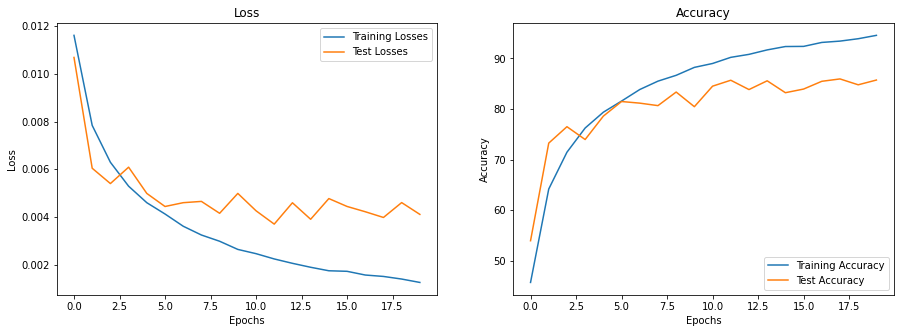

In [12]:
plot_acc_loss(train_a,train_loss,test_a,test_loss)

Files already downloaded and verified
Files already downloaded and verified


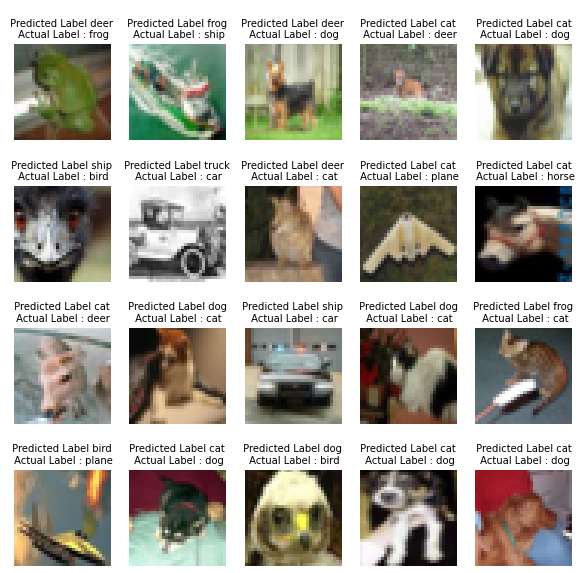

In [13]:
display_incorrect_images(wrong_pre)

In [14]:
target_layers = ["layer1", "layer2","layer3", "layer4"]
torch.autograd.set_detect_anomaly(True)

In [15]:
gradcam_output, probs, predicted_classes = generate_gradcam(wrong_pre[:10], model_tr, target_layers, device)

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Files already downloaded and verified
Files already downloaded and verified


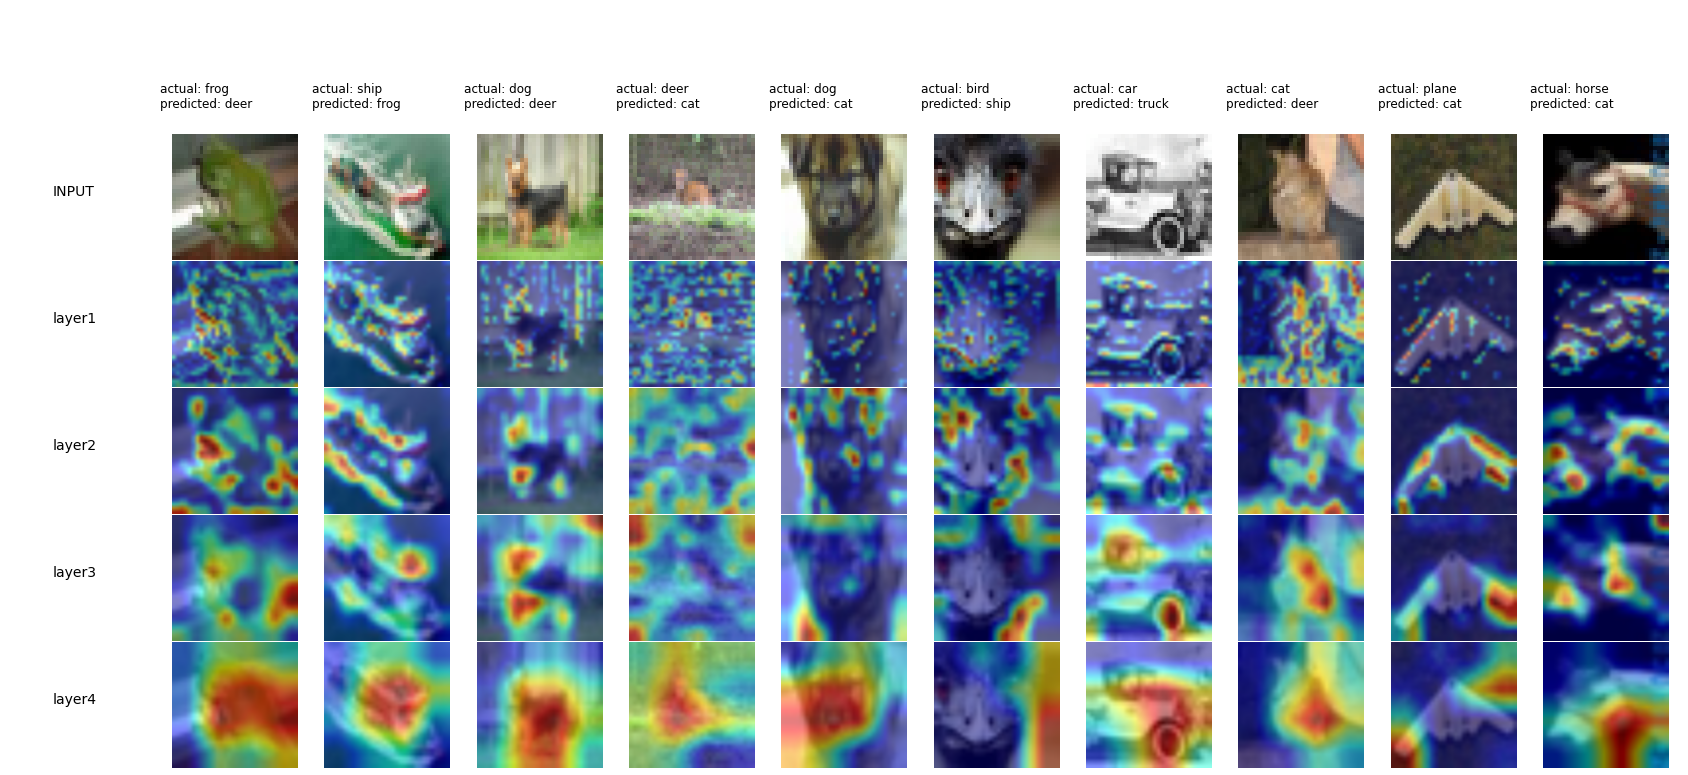

In [16]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plot_gradcam(gradcam_output, target_layers, classes, (3,32,32), predicted_classes, wrong_pre[:10])